# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import operator

import imageio
import glob

import os.path as path
import cv2

In [2]:
data = ['hat', 'headphone', 'laptop','bag','handbag','wallet','glasses','watch','kaikorn']

# 2. Write Function

In [3]:
def LoR_create_Xb(X):
    N = X.shape[0]
    ones = np.ones([N, 1])
    Xb = np.hstack([ones, X])
    return Xb

In [4]:
def LoR_find_W_local_mul_class(X, Y, epoch = 1000, lr = 0.1):
    Xb = LoR_create_Xb(X)
    N = Xb.shape[0]
    D_1 = Xb.shape[1]
    K = Y.shape[1]
    W = np.random.randn(D_1, K)/np.sqrt(D_1)
    error_list = []
    for i in range(epoch):
        Yhat = LoR_find_Yhat_mul_class(X, W)
        error = (-Y*np.log(Yhat)).sum()
        error_list.append(error)
        S = np.dot(Xb.T, Y-Yhat)
        W = W + (lr/N)*S
    return W, error_list

In [5]:
def LoR_find_Yhat_mul_class(X, W):
    Xb = LoR_create_Xb(X)
    Z = np.dot(Xb, W)
    Yhat = np.exp(Z)/np.exp(Z).sum(axis=1, keepdims = True)
    return Yhat

In [6]:
def find_error_mul_class(Y, Yhat):
    N = Y.shape[0]
    Y_argmax = np.argmax(Y, axis=1)
    Yhat_argmax = np.argmax(Yhat, axis=1)
    error = 100*(Y_argmax != Yhat_argmax).sum()/N
    return error

In [7]:
def create_onehot_target(label):
    K = len(np.unique(label))
    N = label.shape[0]
    onehot = np.zeros([N, K])
    for i in range(N):
        onehot[i, label[i, 0]] = 1
    return onehot

# 3. Read Data & Prepare Data

In [8]:
glob.glob("data/train/*.png")

['data/train\\0_bag.png',
 'data/train\\0_glasses.png',
 'data/train\\0_handbag.png',
 'data/train\\0_hat.png',
 'data/train\\0_headphone.png',
 'data/train\\0_laptop.png',
 'data/train\\0_wallet.png',
 'data/train\\0_watch.png',
 'data/train\\100_bag.png',
 'data/train\\100_glasses.png',
 'data/train\\100_handbag.png',
 'data/train\\100_headphone.png',
 'data/train\\100_laptop.png',
 'data/train\\100_wallet.png',
 'data/train\\100_watch.png',
 'data/train\\101_bag.png',
 'data/train\\101_glasses.png',
 'data/train\\101_handbag.png',
 'data/train\\101_headphone.png',
 'data/train\\101_laptop.png',
 'data/train\\101_wallet.png',
 'data/train\\101_watch.png',
 'data/train\\102_bag.png',
 'data/train\\102_glasses.png',
 'data/train\\102_handbag.png',
 'data/train\\102_hat.png',
 'data/train\\102_headphone.png',
 'data/train\\102_laptop.png',
 'data/train\\102_wallet.png',
 'data/train\\102_watch.png',
 'data/train\\103_bag.png',
 'data/train\\103_glasses.png',
 'data/train\\103_handbag.pn

In [9]:
image_train = np.empty((0,32*32*3), int)
label_train = np.empty((0,1), int)

num_train = 3902
i = 0
for image_path in glob.glob("data/train/*.png"):
    image = cv2.resize(imageio.imread(image_path),(32,32))
    image = np.array(image)
    image = image.reshape(1, -1)
    image_train = np.vstack((image_train, image))
    label = data.index(path.splitext(path.basename(image_path))[0].split('_', 1)[1])
    label_train = np.vstack((label_train, label))
    
    i += 1
    if i >= num_train:
        break

print(image_train.shape)
print(label_train.shape)

(3902, 3072)
(3902, 1)


In [10]:
X_Train = image_train/255
Y_Train = create_onehot_target(label_train)

In [11]:
image_test = np.empty((0,32*32*3), int)
label_test = np.empty((0,1), int)

num_test = 2338
i = 0
for image_path in glob.glob("data/test/*.png"):
    image = cv2.resize(imageio.imread(image_path),(32,32))
    image = np.array(image)
    image = image.reshape(1, -1)
    image_test = np.vstack((image_test, image))
    
    label = data.index(path.splitext(path.basename(image_path))[0].split('_', 1)[1])
    label_test = np.vstack((label_test, label))
    
    i += 1
    if i >= num_test:
        break

print(image_test.shape)
print(label_test.shape)

(2335, 3072)
(2335, 1)


In [12]:
X_Test = image_test/255
Y_Test = create_onehot_target(label_test)

# 4. Create Model

In [13]:
W, error_list = LoR_find_W_local_mul_class(X_Train, Y_Train)

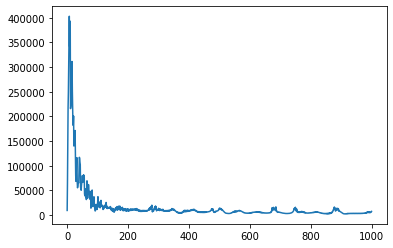

In [14]:
plt.plot(error_list)

In [15]:
Yhat_Train = LoR_find_Yhat_mul_class(X_Train, W)

In [16]:
error_Train = find_error_mul_class(Y_Train, Yhat_Train)

In [17]:
error_Train

22.578165043567402

# 5. Make Prediction

In [18]:
Yhat_Test = LoR_find_Yhat_mul_class(X_Test, W)

In [19]:
error_Test = find_error_mul_class(Y_Test, Yhat_Test)

In [20]:
error_Test

32.07708779443255

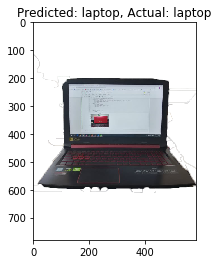

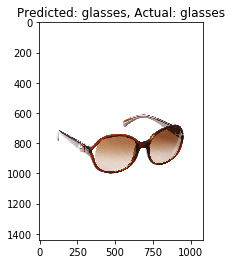

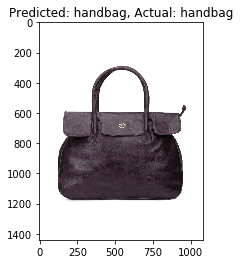

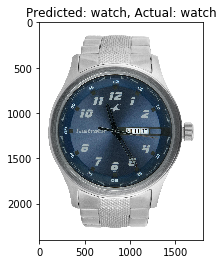

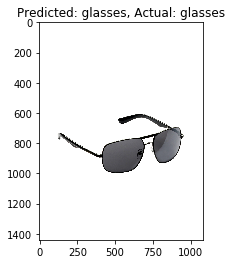

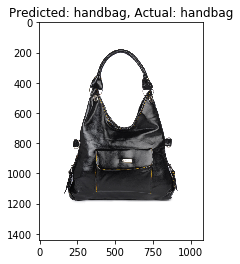

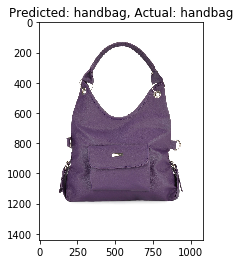

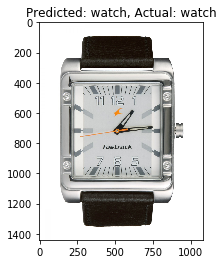

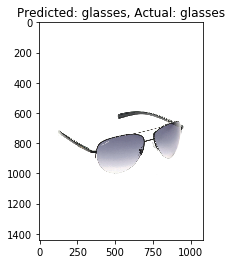

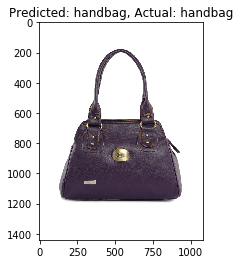

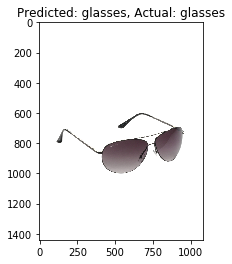

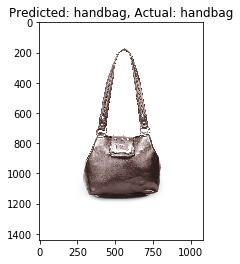

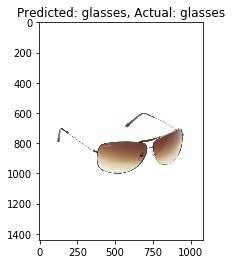

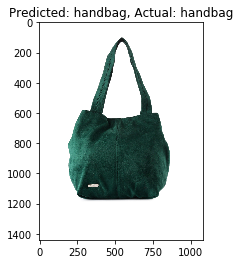

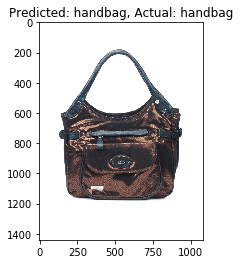

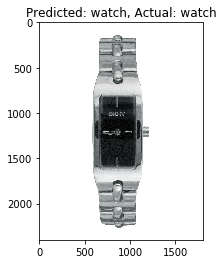

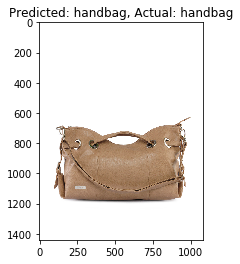

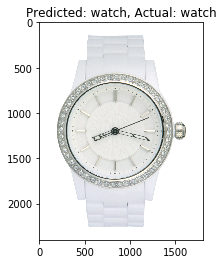

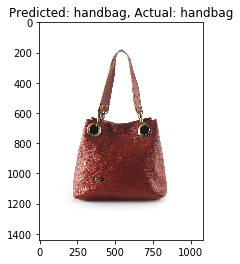

19


In [21]:
num_test = 100
sumi = 0

for i, image_path in enumerate(glob.glob("data/pt/*.png")):
    image = imageio.imread(image_path)
    image = np.array(image)
    
    label = int(data.index(path.splitext(path.basename(image_path))[0].split('_', 1)[1]))
    
    predicted = np.argmax(Yhat_Test, axis=1)[i]
    if predicted == label:
        plt.title('Predicted: {}, Actual: {}'.format(data[predicted],data[label]))
        plt.imshow(image, cmap='gray')
        plt.show()
        sumi=sumi+1
        
    
    if i >= num_test - 1:
        break
        
print(sumi)        
 